In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

plt.style.use('bmh')
%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['axes.titlepad'] = 25
sns.set_color_codes('pastel')

In [14]:
orders = pd.read_csv('orders.csv', header = 0)
departments = pd.read_csv('departments.csv', header = 0)
products = pd.read_csv('products.csv', header = 0)
order_products_train = pd.read_csv('order_products__train.csv', header = 0)
order_products_prior = pd.read_csv('order_products__prior.csv', header = 0)
aisles = pd.read_csv('aisles.csv', header = 0)

In [15]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


C:\Users\rossr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


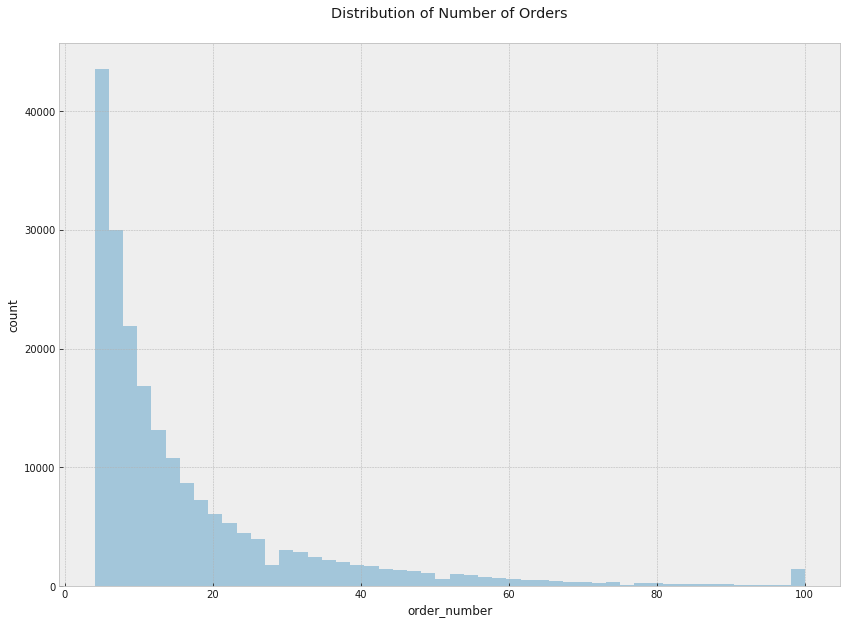

In [16]:
plt.title('Distribution of Number of Orders')
plt.ylabel('count')
sns.distplot(orders.groupby('user_id').order_number.max(), kde = False, norm_hist = False)

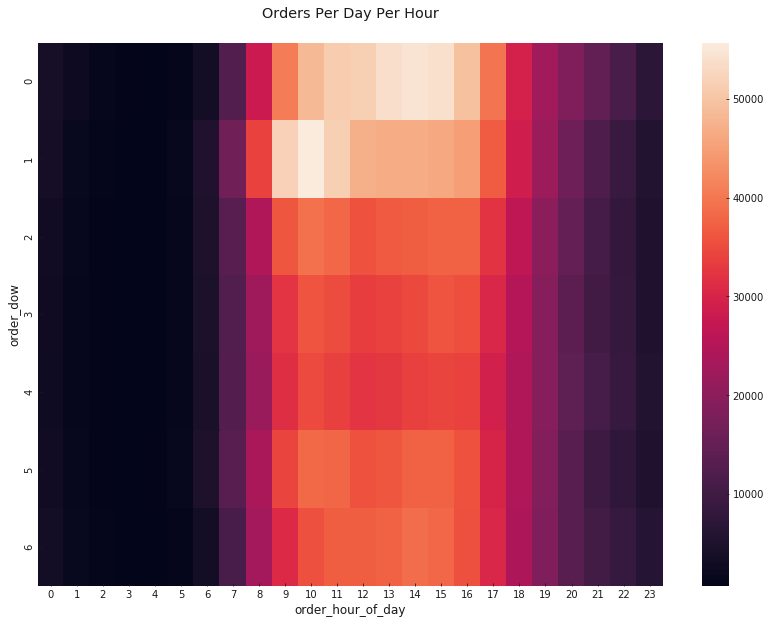

In [17]:
to_plot = pd.pivot_table(data = orders,
                         index = 'order_dow',
                         columns = 'order_hour_of_day',
                         values = 'order_id',
                         aggfunc = 'count')

plt.title('Orders Per Day Per Hour')
sns.heatmap(to_plot)